## GRIP-The Spark Foundation
### Data Science & Business Analytics Internship
### Task: Prediction using supervised ML
Author: Ashutosh Pradhan

Gmail: pradhanashutosh942@gmail.com 

Dataset Link: http://bit.ly/w-data

Problem Statement :

*   Predict the percentage of a student based on the no. of study hours.
*   What will be predicted score if a student studies for 9.25 hrs/ day?





### Importing libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the XLSX dataset as a pandas dataframe

In [17]:
path="/content/studentpred data.xlsx"
data=pd.read_excel(path)

In [18]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Information About Data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Stastical information

In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data.shape

(25, 2)

### Visualize the data

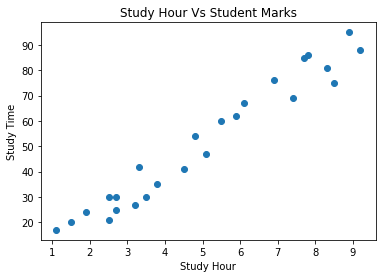

In [25]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.ylabel("Study Time")
plt.xlabel("Study Hour")
plt.title("Study Hour Vs Student Marks")
plt.show()

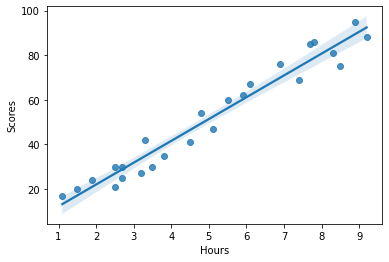

In [29]:
sns.regplot(x=data['Hours'], y=data['Scores']);

In [30]:
X = data[['Hours']]
y = data['Scores']

### Train-test split

In [31]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [37]:
print("shape of X train",train_X.shape)
print("shape of y train",train_y.shape)
print("shape of X test",val_X.shape)
print("shape of y test",val_y.shape)

shape of X train (18, 1)
shape of y train (18,)
shape of X test (7, 1)
shape of y test (7,)


### Model building

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(train_X,train_y)

LinearRegression()

In [39]:
lr.coef_

array([9.94167834])

In [40]:
lr.intercept_

1.9322042531516601

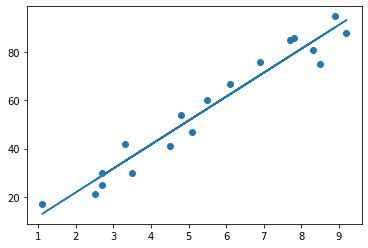

In [42]:
line= lr.coef_*train_X+lr.intercept_

plt.scatter(train_X,train_y)
plt.plot(train_X,line);
plt.show()

In [45]:
y_pred=lr.predict(val_X)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [48]:
pd.DataFrame({'Actual': val_y, 'Predicted': y_pred})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


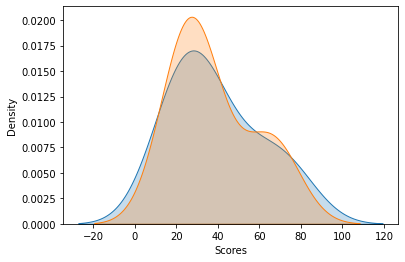

In [49]:
## Actual vs Predicted distribution plot 

sns.kdeplot(y_pred,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

In [51]:
print('Train accuracy: ', lr.score(train_X, train_y),'\nTest accuracy : ', lr.score(val_X, val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365056


In [52]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = lr.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341652


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
